# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score

# Reading the Data

In [12]:
df = pd.read_excel('data 1.xlsx')
df.head()

,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
0,1.0,10.510076,6.166544,10.269649,11.999203,1
1,1.0,11.739776,7.024066,10.494287,6.495638,1
2,1.0,7.857070,5.909366,8.516879,7.102108,1
3,1.0,10.817929,5.920890,8.979736,9.196251,1
4,1.0,10.302407,6.984937,9.553005,7.120283,1


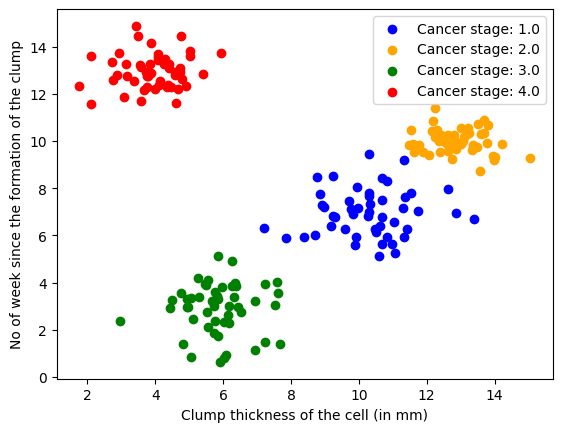

In [13]:
# plotting clump thickness vs no of week with their class labels
class1 = df[df['Cancer stage'] == 1.0]
class2 = df[df['Cancer stage'] == 2.0]
class3 = df[df['Cancer stage'] == 3.0]
class4 = df[df['Cancer stage'] == 4.0]

plt.scatter(class1['Clump thickness'], class1['No of week'], color='blue', label='Cancer stage: 1.0')
plt.scatter(class2['Clump thickness'], class2['No of week'], color='orange', label='Cancer stage: 2.0')
plt.scatter(class3['Clump thickness'], class3['No of week'], color='green', label='Cancer stage: 3.0')
plt.scatter(class4['Clump thickness'], class4['No of week'], color='red', label='Cancer stage: 4.0')
plt.xlabel('Clump thickness of the cell (in mm)')
plt.ylabel('No of week since the formation of the clump')
plt.legend()
plt.show()

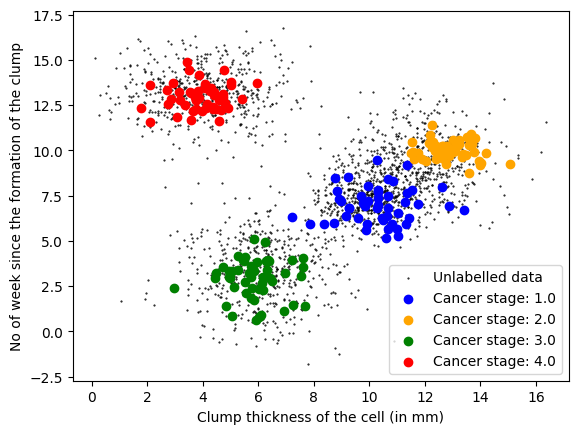

In [17]:
# plotting the other 2000 data points
plt.scatter(df['Clump thickness_new'], df['No of week_new'], marker='.', color='black', s=1, label='Unlabelled data')
plt.scatter(class1['Clump thickness'], class1['No of week'], color='blue', label='Cancer stage: 1.0')
plt.scatter(class2['Clump thickness'], class2['No of week'], color='orange', label='Cancer stage: 2.0')
plt.scatter(class3['Clump thickness'], class3['No of week'], color='green', label='Cancer stage: 3.0')
plt.scatter(class4['Clump thickness'], class4['No of week'], color='red', label='Cancer stage: 4.0')

plt.xlabel('Clump thickness of the cell (in mm)')
plt.ylabel('No of week since the formation of the clump')
plt.legend()
plt.show()